In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np


In [2]:
logins=pd.read_json('Jenny.json')
logins.info()
print(logins.max())
print(logins.min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
login_time   1970-04-13 18:57:38
dtype: datetime64[ns]
login_time   1970-01-01 20:12:16
dtype: datetime64[ns]


In [3]:
logins.login_time=pd.to_datetime(logins['login_time'])
logins['count']=''
logins.set_index('login_time', inplace=True)
logins=logins.resample('15T').count()

In [4]:
logins.columns

Index(['count'], dtype='object')

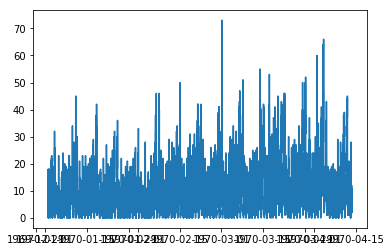

In [5]:
plt.plot(logins['count'])

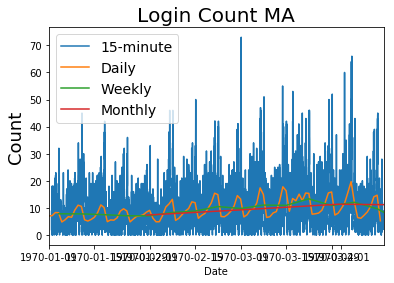

In [6]:
plt.plot(logins)
plt.plot(logins.groupby(pd.Grouper(freq='D')).mean())
plt.plot(logins.groupby(pd.Grouper(freq='W')).mean())
plt.plot(logins.groupby(pd.Grouper(freq='M')).mean())
plt.xlabel('Date')
plt.ylabel('Count', fontsize=18)
plt.xlim(['1970-01-01', '1970-04-14'])
plt.title('Login Count MA', fontsize=20);
plt.legend(['15-minute', 'Daily', 'Weekly', 'Monthly'], fontsize=14);



Part 1

The logins data covers about four months worth of data of logins, but the timestamp is the 1970's. the dates probably need to be double checked. It seems that there are generally circa 10 logins every 15 minutes, with some daily seasonality clearly present. There do not seem to be any strong monthly or weekly trends.

Part 2

1. I would use the number of rides driven by the driver as the metric of interest. The hope is that drivers will offer more rides if Ultimate covers their toll fees. If they do, this will result in more profit for Ultimate. If paying the toll fee does not cause an increase in rides completed, it would suggest that covering the price of toll will not increase profit.

2. To determine if paying the toll for drivers is a good idea, I would conduct an A/B test to determine difference of mean. I would pay the toll for a small percentage of the drivers(<.05) for a period of 1 week- 1 month, depending on resources. I would compare the the average number of trips completed by drivers with tolls covered against those without the toll covered. Based on the data, if there is a difference of mean with significance level over .95, I will conclude that paying tolls cause more rides completed. From there, it becomes a matter of determining the actual profitablility of implementing the toll subsidization plan

In [7]:
# Read in the json file 
import json
with open('Bubba.json', 'r') as json_file:
    json_data = json.load(json_file)

# Convert json data to a dataframe 
df = pd.DataFrame(json_data)

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [9]:
df[df.avg_rating_of_driver.isnull()]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0
12,20.29,5.0,NaN,1.00,Winterfell,2014-03-12,iPhone,2014-01-15,0.0,1,False,100.0
14,26.01,5.0,NaN,1.00,Astapor,2014-01-28,Android,2014-01-27,0.0,1,False,100.0
15,13.20,5.0,NaN,1.00,Winterfell,2014-01-16,Android,2014-01-15,0.0,1,True,100.0
20,2.53,3.0,NaN,1.00,Winterfell,2014-03-16,Android,2014-01-31,0.0,1,False,50.0
21,3.31,5.0,NaN,1.00,Astapor,2014-04-29,iPhone,2014-01-09,0.0,1,False,100.0
22,11.47,5.0,NaN,1.00,Winterfell,2014-05-02,iPhone,2014-01-24,0.0,0,False,100.0
25,14.48,5.0,NaN,1.00,Winterfell,2014-01-03,iPhone,2014-01-02,0.0,1,True,100.0
28,5.97,5.0,NaN,1.50,Winterfell,2014-06-08,iPhone,2014-01-19,100.0,0,False,0.0


In [10]:
df.last_trip_date=pd.to_datetime(df.last_trip_date)
df.signup_date=pd.to_datetime(df.signup_date)


In [11]:
print(df.last_trip_date.max())
print(df.last_trip_date.min())

2014-07-01 00:00:00
2014-01-01 00:00:00


In [12]:
df['last_active_month']=pd.DatetimeIndex(df.last_trip_date).month
df.last_active_month.value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: last_active_month, dtype: int64

In [13]:
df['target']=df.last_active_month.apply(lambda x: 0 if x>5 else 1)


In [15]:
df.target.value_counts()

1    31196
0    18804
Name: target, dtype: int64

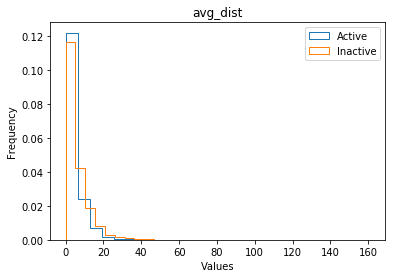

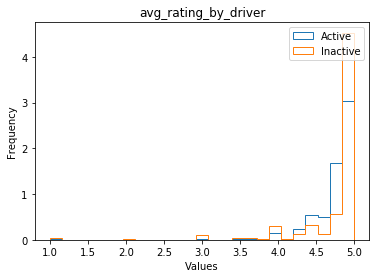

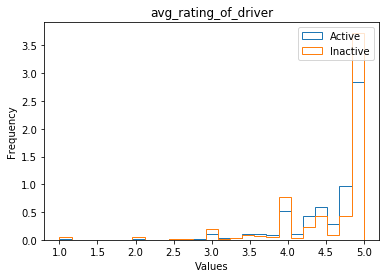

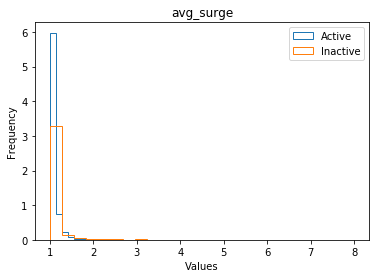

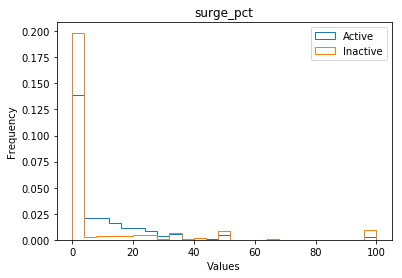

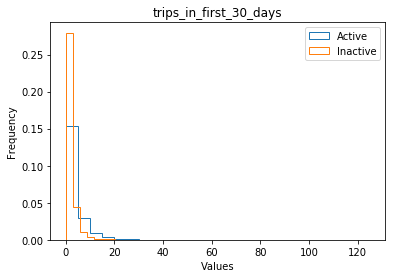

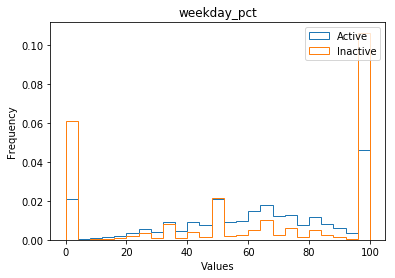

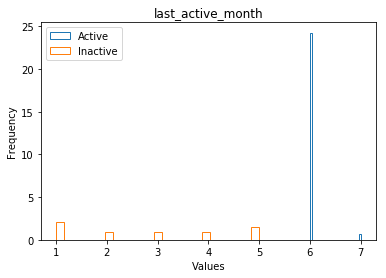

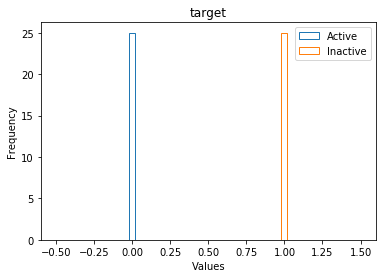

In [16]:
for column in df.columns:
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        df[df.target==0][column].plot(kind='hist',bins=25, histtype='step',density=True)
        df[df.target==1][column].plot(kind='hist',bins=25, histtype='step',density=True)

        plt.legend(['Active','Inactive'])
        plt.title(str(column))
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()
       


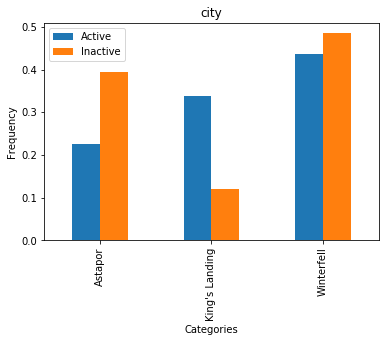

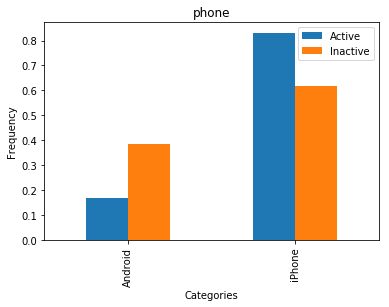

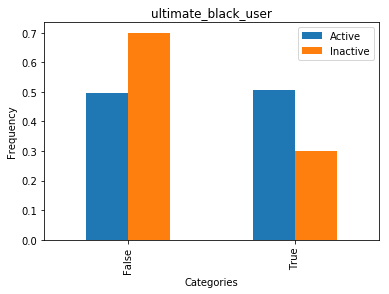

In [17]:
for column in df.columns:
    if(df[column].dtype != np.float64 and df[column].dtype != np.int64):
        if(df[column].value_counts().size<12):
            temp=pd.DataFrame()
            temp.loc[:,'target']=df.target
            temp.loc[:,column]=df[column]
            temp.loc[:,'number']=''
            temp=temp.groupby([column,'target']).agg('count').unstack(level=1)
            temp.columns=temp.columns.droplevel()
            temp.iloc[:,0]=temp.iloc[:,0]/temp[0].sum()
            temp.iloc[:,1]=temp.iloc[:,1]/temp[1].sum()
            temp.plot(kind='bar')
            plt.legend(['Active','Inactive'])
            plt.xlabel('Categories')
            plt.ylabel('Frequency')
            plt.title(str(column))
            plt.show()

In [18]:
y=df.target
df=df.drop(['last_trip_date','signup_date','last_active_month','target'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [26]:
from sklearn.preprocessing import scale
X=pd.get_dummies(df,drop_first=True)
X=X.fillna(X.median())
Xscaled=scale(X)


/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, random_state=15)
rf=RandomForestClassifier()


In [28]:
from sklearn.metrics import precision_recall_curve as prc,f1_score, recall_score, precision_score, roc_auc_score,roc_curve,accuracy_score, confusion_matrix, classification_report
rf.fit(X_train, y_train)
print('the Precision is '+str(precision_score(y_true=y_test,y_pred=rf.predict(X_test))))
print('the Recall is '+str(recall_score(y_true=y_test,y_pred=rf.predict(X_test))))
print('the f1 score is '+str(f1_score(y_test,rf.predict(X_test))))
print('the accuracy score is '+str(accuracy_score(y_test,rf.predict(X_test))))
print(confusion_matrix(y_test,rf.predict(X_test)))
print(classification_report(y_test,rf.predict(X_test)))



/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


the Precision is 0.802757859900717
the Recall is 0.7762133333333333
the f1 score is 0.7892624728850326
the accuracy score is 0.7409333333333333
[[3837 1788]
 [2098 7277]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      5625
           1       0.80      0.78      0.79      9375

   micro avg       0.74      0.74      0.74     15000
   macro avg       0.72      0.73      0.73     15000
weighted avg       0.74      0.74      0.74     15000



In [29]:
imp_feat = pd.DataFrame({'feature':np.array(X.columns), 'importance':rf.feature_importances_})
imp_feat.sort_values('importance', ascending=False, inplace=True)
imp_feat.head()

,feature,importance
0,avg_dist,0.299867
1,avg_rating_by_driver,0.136124
7,weekday_pct,0.121660
4,surge_pct,0.088519
5,trips_in_first_30_days,0.079831


Part 3
1. In order to visualize the data, I created the target variable for the analysis (Customer Activity Statas) by using the last_trip_date column to determine which riders used Ultimate in the last month. Using that column, I created a series of comparitive bar graphs that highlight and compare the distributions of variables for inactive vs active customers. Most of the columns have weak correlations with the target variable, so the data is likely well suited for machine learning. I used random forest to classify the data because the model can determine feature improtance and because it is a very strong out of box model. Since the model prefers null values filled in with median, i did that. Random forest doesnt really care about feature scaling, but I scaled them anyways for good measure.
2. The random forest model returned a precision and recall of .65 and .68 respectively for classifying riders as active/inactive and has a aclassification precision and recall for inactive riders.The most important features when determining retention are avg_dist, avg_ating_b_driver, and weekday_pct. 
3. Given that the model performs relatively well, Ultimate can use this data to identify the customers that are both high risk of lapsing and customers at that are likely to return to the platform given the right promotion. For example, customers that are active but misclassified as inactive may be at high risk of lapsing and could be given a promotion, while customers tht are currently inactive but classified as active may be enticed back to the platform by.a promotion.